In this section, we will look at two popular clustering algorithms, KMeans and DBSCAN, and explore some of their applications, such as
nonlinear dimensionality reduction, semi-supervised learning, and
anomaly detection

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

####  Create the Data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [6]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [7]:
X.shape, y.shape

((2000, 2), (2000,))

In [11]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

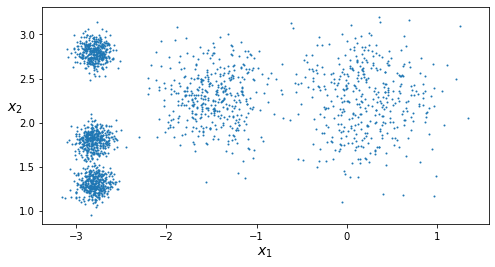

In [12]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

In [ ]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [29]:
y_pred

array([4, 1, 2, ..., 3, 2, 1])

The KMeans instance preserves a copy of the labels of the
instances it was trained on, available via the labels_ instance variable

In [30]:
print(y_pred)
y_pred is kmeans.labels_

[4 1 2 ... 3 2 1]


True

We can also take a look at the five centroids that the algorithm found

In [31]:
kmeans.cluster_centers_

array([[-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

we can easily assign new instances

In [32]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 3, 3])

### Decision Boundaries

In [164]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        


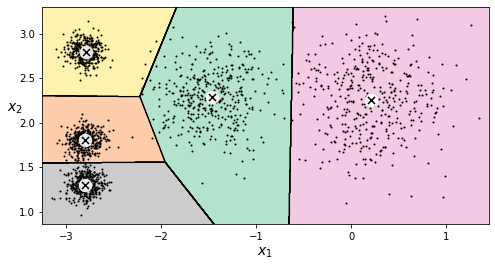

In [165]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

Instead of assigning each instance to a single cluster, which is called hard
clustering, it can be useful to give each instance a score per cluster, which
is called soft clustering. 

- the score can be a distance between the instance and the centroid.
- it can also be a similarity score.

 In the KMeans class, the transform() method measures the
distance from each instance to every centroid

In [ ]:
kmeans.transform(X_new)

If
you have a high-dimensional dataset and you transform it this way, you
end up with a k-dimensional dataset: this transformation can be a very
efficient nonlinear dimensionality reduction technique

### Kmeans algorithm

the process of Kmeans: 

- picking k instances randomly.
- label the instances.
- update the centroids

repeat until the centroids stop moving


###### Centroid initialization methods

If you happen to know approximately where the centroids should be (e.g.,if you ran another clustering algorithm earlier), then you can set the init hyperparameter to a NumPy array containing the list of centroids, and set
n_init to 1

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

Another solution is to run the algorithm multiple times with different
random initializations and keep the best solution. 


The number of randomin itializations is controlled by the n_init hyperparameter: by default, it is
equal to 10, which means that the whole algorithm described earlier runs
10 times when you call fit(), and Scikit-Learn keeps the best solution

### Inertia

To knwo the best solution, it uses a performance metric! That metric is called the model’s inertia, which is the
mean squared distance between each instance and its closest centroid.

- The KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia

In [ ]:
kmeans.fit(X)
kmeans.inertia_

In [ ]:
kmeans.score(X)

#### K-means++

ensures that instances farther away
from already chosen centroids are much more likely be selected
as centroids.
Repeat the previous step until all k centroids have been chosen.
The KMeans class uses this initialization method by default. If you want to
force it to use the original method (i.e., picking k instances randomly to
define the initial centroids), then you can set the init hyperparameter to
"random"

#### Accelerated K-Means and mini-batch K-Means


Instead of using the full dataset at each
iteration, the algorithm is capable of using mini-batches, moving the
centroids just slightly at each iteration. This speeds up the algorithm
typically by a factor of three or four and makes it possible to cluster huge
datasets that do not fit in memory. 

In [ ]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

#### Finding the optimal number of clusters
The inertia is not a good performance metric when trying to choose k because it keeps getting lower as we increase k.

A more precise approach (but also more computationally expensive) is to use the silhouette score, which is the mean silhouette coef icient over all the instances.

The silhouette coefficient can vary between –1 and +1. A coefficient close to +1 means that the instance is well inside its
own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the wrong cluster.



In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

An even more informative visualization is obtained when you plot every instance’s silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram

When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters.

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

 #### Limits of K-Means
 As we saw, it is necessary to run the algorithm several times to avoid suboptimal solutions, plus you need to specify the number of clusters, which can be quite a hassle. Moreover, K-Means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes
 
-  depending on the data, different clustering algorithms may perform better. On these types of elliptical clusters,Gaussian mixture models work great

#### Using Clustering for Image Segmentation

- In semantic segmentation, all pixels that are part of the same object type get assigned to the same segment.
-  In instance segmentation, all pixels that are part of the same individual object are assigned to the same segment.

Here, we are going to do something much simpler: color segmentation. We will simply assign pixels to the same
segment if they have a similar color

In [ ]:
from matplotlib.image import imread 
image = imread(os.path.join("images","unsupervised_learning","ladybug.png"))
image.shape

The following code reshapes the array to get a long list of RGB colors, then it clusters these colors using K-Means

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

##### Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm

In [ ]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
X_digits.shape

In [ ]:
# split it to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

In [ ]:
##Let’s evaluate its accuracy on the test set:
log_reg.score(X_test, y_test)

 Let’s see if we can do better by using K-Means as a preprocessing step. We will create a pipeline that will
first cluster the training set into 50 clusters and replace the images with their distances to these 50 clusters, then apply a Logistic Regression
model

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=100)),
("log_reg", LogisticRegression())])

pipeline.fit(X_train, y_train)

In [ ]:
## lets evaluate this classification pipeline
pipeline.score(X_test, y_test)

we can surely do better.
Since K-Means is just a preprocessing step in a classification pipeline,
finding a good value for k is much simpler than earlier. There’s no need to
perform silhouette analysis or minimize the inertia; the best value of k is
simply the one that results in the best classification performance during
cross-validation. We can use GridSearchCV to find the optimal number of
clusters

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

In [ ]:
print(grid_clf.best_params_)
##{'kmeans__n_clusters': 99}
grid_clf.score(X_test, y_test)
###0.9822222222222222

##  You may want to keep exploring higher values for k, since 99 was the largest value in the range we explored.

#### Using Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances.

In [86]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

C:\Users\omar\miniconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
# the performance of the model
log_reg.score(X_test, y_test)
## It should come as no surprise that this is muchlower than earlier, when we trained the model on the full training set

0.8533333333333334

In [ ]:
# let’s cluster the training set into 50clusters. Then for each cluster, let’s find the image closest to the centroid.
# We will call these images the representative images
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [81]:
representative_digit_idx.shape, representative_digit_idx

((50,),
 array([  66,  225,  588,   96,  578,  117, 1067,  275, 1253,  145,  983,
        1316,  437,  228, 1083,  959,  936,  419,  841,  389,  288, 1143,
        1064,  556,   32,  326,  855,  671,  927, 1159,  743,  700,  487,
          20,  802,  750,  579,   56,  449,  631,  903,  466,  637,  821,
         179,   48, 1248, 1072,  718,  209], dtype=int64))

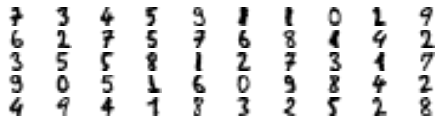

In [82]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [83]:
y_train[representative_digit_idx]

array([7, 3, 4, 5, 9, 1, 1, 0, 2, 9, 6, 2, 7, 5, 7, 6, 8, 1, 4, 2, 3, 5,
       5, 8, 1, 2, 7, 3, 1, 7, 9, 0, 5, 1, 6, 0, 9, 8, 4, 2, 4, 9, 4, 1,
       8, 3, 2, 5, 2, 8])

In [ ]:
#y_representative_digits = np.array([4, 8, 0, 6, 8, 3, ..., 7, 6, 2, 3, 1,
#1])

In [84]:
y_representative_digits = np.array([7, 3, 4, 5, 9, 1, 1, 0, 2, 9, 6, 2, 7, 5, 7, 6, 8, 1, 4, 2, 3, 5,
       5, 8, 1, 2, 7, 3, 1, 7, 9, 0, 5, 1, 6, 0, 9, 8, 4, 2, 4, 9, 4, 1,
       8, 3, 2, 5, 2, 8])

Now we have a dataset with just 50 labeled instances, but instead of being
random instances, each of them is a representative image of its cluster.
Let’s see if the performance is any better

In [85]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)
# Wow! We jumped from 83.3% accuracy to 92.2%, although we are still only training the model on 50 instances.

C:\Users\omar\miniconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9111111111111111

In [88]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [89]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

C:\Users\omar\miniconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9022222222222223

 Let’s see what happens if we only propagate the labels to the 20% of the instances
that are closest to the centroids

In [90]:
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [91]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

C:\Users\omar\miniconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.94

Nice! With just 50 labeled instances (only 5 examples per class on
average!), we got 94.0% accuracy, which is pretty close to the performance
of Logistic Regression on the fully labeled digits dataset (which was
96.9%). This good performance is due to the fact that the propagated
labels are actually pretty good—their accuracy is very close to 99%, as the
following code shows

In [ ]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])


### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

In [ ]:
X.shape

In [ ]:
dbscan.labels_

In [80]:
len(dbscan.core_sample_indices_)

802

In [ ]:
# indices of the core instances
dbscan.core_sample_indices_

In [ ]:
# the core instances themselves
dbscan.components_

In [92]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [94]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)


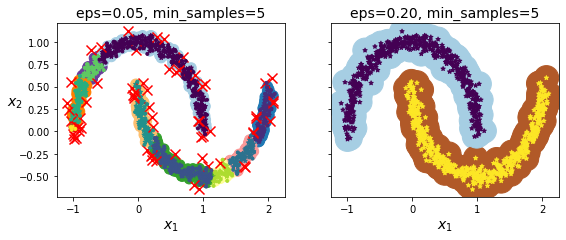

In [95]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [101]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
# predict which cluster they most likely belong to
print(knn.predict(X_new))
# predict the proba for each cluster
print(knn.predict_proba(X_new))

[0 1 0 1]
[[0.88 0.12]
 [0.   1.  ]
 [0.8  0.2 ]
 [0.   1.  ]]


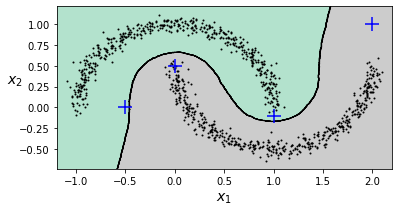

In [111]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

Note that we only trained the classifier on the core instances, but we could
also have chosen to train it on all the instances, or all but the anomalies:
this choice depends on the final task

In [110]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan2.labels_[dbscan2.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  1,  0, -1], dtype=int64)

### Gaussian Mixtures

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown.


All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density, and orientation

- The random variable x is known (observed variable).
- The unknown random variables z are called lattent variables.

Given the dataset X, you typically want to start by estimating the weights ϕ and all the distribution
parameters mu and sigma (1 - k).


In [7]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [8]:
X.shape

(1250, 2)

In [9]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

Lets look at the parameters that the algorithm estimated.

In [10]:
gm.weights_

array([0.20961444, 0.39032584, 0.40005972])

In [11]:
 gm.means_

array([[ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576],
       [-1.40764129,  1.42712848]])

In [12]:
 gm.covariances_

array([[[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]]])

You can check whether or not the algorithm converged and how many
iterations it took

In [13]:
gm.converged_

True

In [14]:
gm.n_iter_

4

Now that you have an estimate of the location, size, shape, orientation, and
relative weight of each cluster, the model can easily assign each instance
to the most likely cluster (hard clustering) or estimate the probability that
it belongs to a particular cluster (soft clustering).

-  Just use the predict() method for hard clustering, or the predict_proba() method for soft clustering

In [15]:
gm.predict(X)

array([1, 1, 2, ..., 0, 0, 0], dtype=int64)

In [16]:
gm.predict_proba(X)

array([[2.31833274e-02, 9.76815996e-01, 6.76282339e-07],
       [1.64110061e-02, 9.82914418e-01, 6.74575575e-04],
       [1.99781831e-06, 7.52377580e-05, 9.99922764e-01],
       ...,
       [9.99999568e-01, 4.31902443e-07, 2.12540639e-26],
       [1.00000000e+00, 5.20915318e-16, 1.45002917e-41],
       [1.00000000e+00, 2.30971331e-15, 7.93266114e-41]])

A Gaussian mixture model is a generative model, meaning you can sample
new instances from it (note that they are ordered by cluster index)

In [ ]:
X_new, y_new = gm.sample(6)
X_new

In [ ]:
y_new

It is also possible to estimate the density of the model at any given
location. This is achieved using the score_samples() method: for each
instance it is given, this method estimates the log of the probability density function (PDF) at that location. The greater the score, the higher
the density:

In [17]:
gm.score_samples(X)
# If you compute the exponential of these scores, you get the value of the
#PDF at the location of the given instances.

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

In [21]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

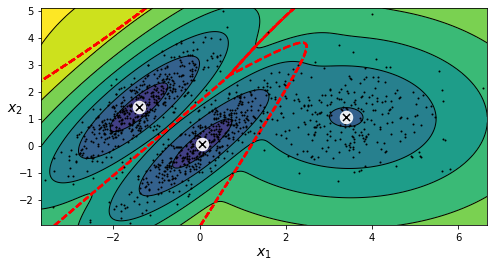

In [22]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)

 When there are many dimensions, or many clusters, or few
instances, EM can struggle to converge to the optimal solution. You might
need to reduce the difficulty of the task by limiting the number of
parameters that the algorithm has to learn. One way to do this is to limit
the range of shapes and orientations that the clusters can have. This can be
achieved by imposing constraints on the covariance matrices

### Anomaly Detection Using Gaussian Mixtures

- Any instance located in a low-density region can be considered an anomaly.
- You must define what density threshold you want to use. 


Here is how you would identify
the outliers using the fourth percentile lowest density as the threshold (i.e.,
approximately 4% of the instances will be flagged as anomalies

In [23]:
import numpy as np
# we generate first the densities for each instance.
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [32]:
X[densities<density_threshold].shape[0]/X.shape[0]

0.04

A close relative task is novelty detection: it differs from anomaly
detection in that the algorithm is assumed to be trained on a “clean”
dataset, uncontaminated by outliers, whereas anomaly detection does not
make this assumption. Indeed, outlier detection is often used to clean up a
dataset.

- Just like K-Means, the GaussianMixture algorithm requires you to specify the number of clusters. So, how can you find it?

#### Selecting the Number of Clusters


With K-Means, you could use the inertia or the silhouette score to select
the appropriate number of clusters. But with Gaussian mixtures, it is not
possible to use these metrics because they are not reliable when the
clusters are not spherical or have different sizes. Instead, you can try to
find the model that minimizes a theoretical information criterion, such as
the Bayesian information criterion (BIC) or the Akaike information
criterion (AIC)

Once you have estimated ˆθ, the value of θ that maximizes the
likelihood function, then you are ready to compute Lˆ = L (ˆθ, X), which is the value used to compute the AIC and BIC; you can think of it as a measure of how well the model fits the data.

In [33]:
gm.bic(X)

8189.733705221635

In [34]:
gm.aic(X)

8102.508425106597

In [38]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [39]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

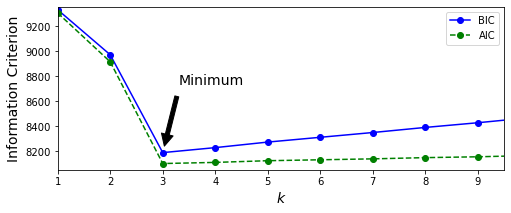

In [40]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

#### Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of clusters, you
can use the BayesianGaussianMixture class, which is capable of giving
weights equal (or close) to zero to unnecessary clusters.

Set the number of
clusters n_components to a value that you have good reason to believe is
greater than the optimal number of clusters (this assumes some minimal
knowledge about the problem at hand), and the algorithm will eliminate
the unnecessary clusters automatically.

In [41]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4 , 0.12, 0.4 , 0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

Perfect: the algorithm automatically detected that only three clusters are
needed